# Isomorphisms and automorphisms

## Requirements

`pymnet` uses third-party software to solve graph-isomorphism problems, i.e., some of its functionality depends on having this software installed. Some of the functionality is redundant in a way that optional software packages can be used to solve the same problem, and only one of them is needed to be installed to gain access to that functionality.
- `networkx`: Available through `pip`. Allows the usage of the following functions: `is_isomorphic`, `get_isomorphism`.
- `bliss-blind`: Installed as a dependency on MacOS, X64 Windows and X64 Linux machines, has to be manually compiled and installed on other system using the command `python -m pip install bliss-bind`. Allows the usage of the following functions: `is_isomorphic`, `get_isomorphism`, `get_automorphism_generators`, `get_complete_invariant`.

## Setup

`pymnet` can deal with generalized graph isomorphisms introduced in [this article](https://doi.org/10.1093/comnet/cnu016). This tutorial introduces the basic multilayer-network isomorphism functionality available in `pymnet`.

Let's start by creating a multilayer social network:

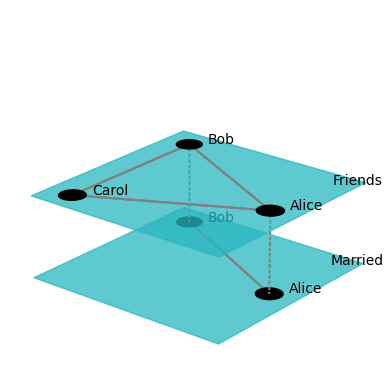

In [1]:
from pymnet import *
net_social = MultiplexNetwork(couplings="categorical", fullyInterconnected=False)
net_social["Alice", "Bob", "Friends"] = 1
net_social["Alice", "Carol", "Friends"] = 1
net_social["Bob", "Carol", "Friends"] = 1
net_social["Alice", "Bob", "Married"] = 1
fig_social = draw(net_social, layout="circular", layerPadding=0.2, defaultLayerLabelLoc=(0.9,0.9))

We want to compare networks, so let's create another network. A transportation network this time:

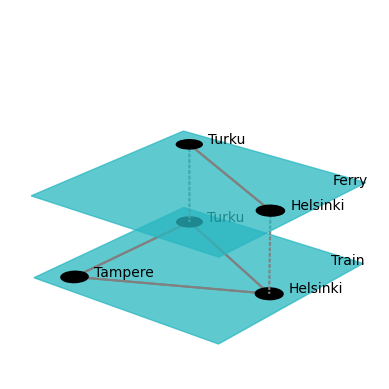

In [2]:
net_transport = MultiplexNetwork(couplings="categorical", fullyInterconnected=False)
net_transport["Helsinki", "Turku", "Train"] = 1
net_transport["Helsinki", "Tampere", "Train"] = 1
net_transport["Turku", "Tampere", "Train"] = 1
net_transport["Helsinki", "Turku", "Ferry"] = 1
fig_transport = draw(net_transport, layout="circular", layerPadding=0.2, defaultLayerLabelLoc=(0.9,0.9))

## Isomorphisms

Clearly, the two above networks have the same structure but different labels of nodes and layers. In terms of multilayer network isomorphisms, this means that the two networks are node-layer isomorphic (but not node isomorphic or layer isomorphic). This can be confirmed using the *is_isomorphic* function as follows: 

In [3]:
print(is_isomorphic(net_social, net_transport, allowed_aspects=[0]))  # node isomorphism

False


In [4]:
print(is_isomorphic(net_social, net_transport, allowed_aspects=[1]))  # layer isomorphism

False


In [5]:
print(is_isomorphic(net_social, net_transport, allowed_aspects=[0, 1]))  # node-layer isomorphism

True


In the above example, the different isomorphism types are specified using the *allowed_aspects* parameter, which takes a list of integers each corresponding to one aspect that can be permuted. The node aspect is the 0th aspect by convention as usual.

We can also recover the isomorphic map from the social network node and layer labels to the transportation network node and layer labels using the *get_isomorphism* function:

In [6]:
print(get_isomorphism(net_social, net_transport))

[{'Alice': 'Helsinki', 'Bob': 'Turku', 'Carol': 'Tampere'}, {'Friends': 'Train', 'Married': 'Ferry'}]


Note that you might want to use the function `get_complete_invariant` if you are doing multiple isomorphism comparisons. The function returns an object that can be directly compared to another complete invariant object to determine if two networks are isomorphic, and there is no need to rerun the expensive graph-isomorphism algorithms.

## Automorphisms

Automorphisms are isomorphisms with the network itself. One can calculate automorphism groups using this library. As automorphisms are isomorphisms, one needs to specify the type of the automorphism exactly in the same way as one does the type of isomorphisms. For example, in the above social network, one can find the only (non-trivial) automorphism where Bob and Alice change labels:

In [7]:
print(get_automorphism_generators(net_social, allowed_aspects=[0])) #node isomorphism

[[{'Alice': 'Bob', 'Bob': 'Alice'}, {}]]


In [8]:
print(get_automorphism_generators(net_social, allowed_aspects=[1])) #layer isomorphism

[]


In [9]:
print(get_automorphism_generators(net_social, allowed_aspects=[0, 1])) #node-layer isomorphism

[[{'Alice': 'Bob', 'Bob': 'Alice'}, {}]]


The function `get_automorphism_generators` returns a list of automorphisms that can be used to generate all possible automorphisms by combining the permutation operations. That is, the list of automorphisms returned form a *generating set of the automorphism group*.

Note that in the above example, the automorphism group given by node isomorphism is the same as the one given by node-layer isomorphism. The node-layer isomorphisms are not always unions of node isomorphisms and layer isomorphisms. To illustrate this, we generate a network that has a slightly more interesting automorphism-group structure:

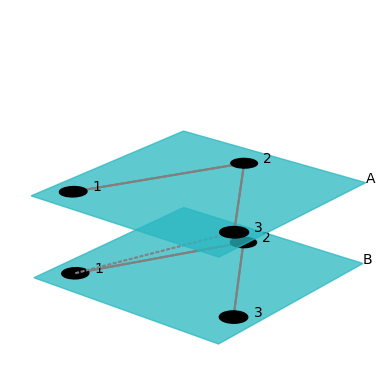

In [10]:
net = MultilayerNetwork(aspects=1)
net[1, "A"][2, "A"] = 1
net[2, "A"][3, "A"] = 1
net[3, "B"][2, "B"] = 1
net[2, "B"][1, "B"] = 1
net[3, "A"][1, "B"] = 1
fig = draw(net, layerPadding=0.2)

For this network, there are no (nontrivial) node automorphisms or layer isomorphisms, but there is a node-layer isomorphism:

In [11]:
print(get_automorphism_generators(net, allowed_aspects=[0]))

[]


In [12]:
print(get_automorphism_generators(net, allowed_aspects=[1]))

[]


In [13]:
print(get_automorphism_generators(net, allowed_aspects=[0, 1]))

[[{1: 3, 3: 1}, {'B': 'A', 'A': 'B'}]]
